### Libraries

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
# !pip install xgboost
# Compare multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from scipy import stats

from openpyxl.workbook import Workbook

# see all variables
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Set working directory to where your data and outputs will go
os.chdir(r"D:\APHRC\GoogleDrive_ii\stata_do_files\madiva\stroke_work")
# Ensuring all directories exist
output_dir = r'D:/APHRC/GoogleDrive_ii/stata_do_files/madiva/stroke_work/multiple_records/'
os.makedirs(output_dir, exist_ok=True)
os.makedirs("model_output", exist_ok=True)
os.makedirs("visualization", exist_ok=True)

### Load data and combine

In [34]:
# Load both datasets
df_agincourt = pd.read_csv(
    "D:/APHRC/GoogleDrive_ii/stata_do_files/madiva/stroke_work/data/df_processed_merged_final_agincourt_site.csv",
    low_memory=False
)

df_nairobi = pd.read_csv(
    "D:/APHRC/GoogleDrive_ii/stata_do_files/madiva/stroke_work/data/df_processed_merged_final_nairobi_site.csv",
    low_memory=False
)

# Add site identifier before concatenating
df_agincourt['site'] = 'agincourt'
df_nairobi['site'] = 'nairobi'

# Concatenate vertically (append rows)
df_combined = pd.concat([df_agincourt, df_nairobi], 
                       ignore_index=True,  # Reset index
                       sort=False)  # Keep column order

print(f"Agincourt shape: {df_agincourt.shape}")
print(f"Nairobi shape: {df_nairobi.shape}")
print(f"Combined shape: {df_combined.shape}")
df = df_combined.copy()

Agincourt shape: (32495, 115)
Nairobi shape: (13261, 339)
Combined shape: (45756, 339)


In [35]:
df_combined.head()

,individual_id,age,sex,source,hdss_name,alco_ever,alco_12m,alco_30d,alco_bing_y,tobac_ever,tobac_cur,tobac_smkls_ever,tobac_p_daily,tobac_freq,fd_fruitservings,fd_meals_outhome_ave,fd_diet_change,fd_fruit_days,fd_veg_days,fd_eat_drink_12h,fd_oil_type,fd_veg_servings,actv_walk_bicycle_days,actv_vigorous_sports_min,actv_mpa_minutes,actv_moderate_sports_hrs,actv_vigorous_sports,actv_mpa_days,actv_vpa_days,actv_sitting_or_standing,actv_walk_bicycle_min,actv_vpa_hrs,actv_walk_bicycle_hrs,actv_walk_bicycle,actv_moderate_sports_days,actv_mpa_hrs,actv_sitting_min,actv_moderate_sports_min,actv_sleeping_hrs,actv_vigorous_sports_days,actv_moderate_sports,actv_vpa_minutes,actv_vpa,actv_mpa,actv_vigorous_sports_hrs,actv_mvpa,actv_sitting_hrs,stroke_ever,stroke_numb,stroke_wkness,stroke_paralysis_ever,stroke_blind,stroke_trans_isc_ever,stroke_parents,stroke_sibling,stroke_other,stroke_children,stroke_fhx,hpt_ever,hpt_rx_ever,hpt_12m,bp_sys,bp_dia,bg_mmol_fst,bg_mmol_random,diab_hx,diab_12m,diab_rx_ever,diab_rx_current,diab_rx_other,diab_rx_2w,diab_rx_12m,diab_rx_trad_curr,diab_rx_other_2w,kidney_rx,pi_acr,stroke_undstn,stroke_verbal,vision_problem,stroke_hl_vis,sex_no_condom_hiv_person,hiv_tested_when_d,hiv_rx_trad_ever,hiv_counselled,hiv_tested,hiv_tested_when_c,hiv_tested_month,hiv_tested_yr,hiv_status_slf_rpt,hiv_test_result,stroke_status_derived,hiv_status_derived,hpt_status_derived,obese_status_derived,diab_status_derived,tb_status_derived,bmi,bmi_refined,is_outlier,alcohol_use,tobacco_use,stroke_status_derived_age,hpt_status_derived_age,diab_status_derived_age,hiv_status_derived_age,stroke_status_derived_incident,hpt_status_derived_incident,diab_status_derived_incident,hiv_status_derived_incident,obs_date,dod,year_stroke,n_records,record_type,site,res_round_intvw,res_round_event,res_datebeg,res_eventdate,res_calendar,res_event,residence,res_ind_ageday,res_ind_ageweek,res_ind_agemonth,res_ind_ageyear,res_ind_agegroup,res_ind_reltohhh,res_ind_gender,res_ind_datebirth,res_ind_dateintodsa,res_ind_dateoutofdsa,res_ind_firstevent,res_ind_lastevent,res_ind_birth_areatype,res_ind_agefirstbirth,res_ind_agefirstmarr,res_ind_agefirstsex,res_ind_ethnicity,res_agebeg,res_hhh_datebirth,res_hhh_gender,res_hhh_ethnicity,res_hha_hhadone,res_hha_sourceyear_wealth,res_hha_wealthindex,res_hha_wealthtertile,res_hha_wealthquintile,res_hha_sourceyear_foodsec,res_hha_hhdhungerscale,res_hha_sourceyear_povertyline,res_hha_isbelowpovertyline,edu_everschool,edu_everschool_level,edu_everschool_class,edu_currschool,edu_currschool_level,edu_currschool_class,edu_currschool_type,gbs_preg_dur,gbs_gravidity,gbs_parity,gbs_totalceb,gbs_multiplebirth,iga_hasiga,iga_noigareason,iga_typeofiga,iga_inc30days_cash,iga_inc30days_kind,los_chddth_allsex_anyage,los_chddth_allsex_under1yrs,los_chddth_allsex_under5yrs,los_chddth_allsex_5to9yrs,los_chddth_allsex_under10yrs,los_chddth_allsex_10to14yrs,los_chddth_allsex_15to19yrs,los_chddth_allsex_20to24yrs,los_chddth_allsex_25to29yrs,los_chddth_allsex_30to34yrs,los_chddth_allsex_35to39yrs,los_chddth_allsex_40to44yrs,los_chddth_allsex_45to49yrs,los_chddth_allsex_50to54yrs,los_chddth_allsex_55to59yrs,los_chddth_allsex_60plusyrs,los_chddth_femsex_anyage,los_chddth_femsex_under1yrs,los_chddth_femsex_under5yrs,los_chddth_femsex_5to9yrs,los_chddth_femsex_under10yrs,los_chddth_femsex_10to14yrs,los_chddth_femsex_15to19yrs,los_chddth_femsex_20to24yrs,los_chddth_femsex_25to29yrs,los_chddth_femsex_30to34yrs,los_chddth_femsex_35to39yrs,los_chddth_femsex_40to44yrs,los_chddth_femsex_45to49yrs,los_chddth_femsex_50to54yrs,los_chddth_femsex_55to59yrs,los_chddth_femsex_60plusyrs,los_chddth_malsex_anyage,los_chddth_malsex_under1yrs,los_chddth_malsex_under5yrs,los_chddth_malsex_5to9yrs,los_chddth_malsex_under10yrs,los_chddth_malsex_10to14yrs,los_chddth_malsex_15to19yrs,los_chddth_malsex_20to24yrs,los_chddth_malsex_25to29yrs,los_chddth_malsex_30to34yrs,los_chddth_malsex_35to39yrs,los_chddth_malsex_40to44yrs,los_chddth_malsex_45to49yrs,los_chddth_malsex_5

### Data preprocessing

In [36]:
# Drop individuals with only one records
df = df[df['record_type']==2]

# Replace invalid values globally
invalid_values = [333, 444, 888, 999, 9999, -8, -9, -10, -333, -444, -555, -888, -999]
df = df.replace(invalid_values, np.nan)
df = df.replace([np.inf, -np.inf], np.nan)

# ------------------------------------------------------------------------------------
print(df.shape)
print(df.sex.value_counts())
df['sex_binary'] = df['sex'].replace({1: 0, 2: 1})  # 0 = male, 1 = female
df['bmi_refined'] = pd.to_numeric(df['bmi_refined'], errors='coerce')
# ------------------------------------------------------------------------------------
# # Based on WHO categories
# df['bmi_category'] = pd.cut(df['bmi_refined'], 
#                             bins=[0, 18.5, 24.9, 29.9, np.inf], 
#                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
# Creating only two categories (making it dichotomous)
df['bmi_category'] = pd.cut(df['bmi_refined'], 
                            bins=[0, 24.9, np.inf], 
                            labels=['Normal_Underweight', 'Overweight_Obese'])

df = pd.get_dummies(df, columns=['bmi_category'], drop_first=True)

# ------------------------------------------------------------------------------------
# Convert all boolean columns to integers (0/1)
df = df.astype({col: int for col in df.select_dtypes(bool).columns})
df = df.replace([np.inf, -np.inf], np.nan)
print(df.sex_binary.value_counts()) 
df.head()

(30146, 339)
sex
2    16391
1    13755
Name: count, dtype: int64
sex_binary
1    16391
0    13755
Name: count, dtype: int64


,individual_id,age,sex,source,hdss_name,alco_ever,alco_12m,alco_30d,alco_bing_y,tobac_ever,tobac_cur,tobac_smkls_ever,tobac_p_daily,tobac_freq,fd_fruitservings,fd_meals_outhome_ave,fd_diet_change,fd_fruit_days,fd_veg_days,fd_eat_drink_12h,fd_oil_type,fd_veg_servings,actv_walk_bicycle_days,actv_vigorous_sports_min,actv_mpa_minutes,actv_moderate_sports_hrs,actv_vigorous_sports,actv_mpa_days,actv_vpa_days,actv_sitting_or_standing,actv_walk_bicycle_min,actv_vpa_hrs,actv_walk_bicycle_hrs,actv_walk_bicycle,actv_moderate_sports_days,actv_mpa_hrs,actv_sitting_min,actv_moderate_sports_min,actv_sleeping_hrs,actv_vigorous_sports_days,actv_moderate_sports,actv_vpa_minutes,actv_vpa,actv_mpa,actv_vigorous_sports_hrs,actv_mvpa,actv_sitting_hrs,stroke_ever,stroke_numb,stroke_wkness,stroke_paralysis_ever,stroke_blind,stroke_trans_isc_ever,stroke_parents,stroke_sibling,stroke_other,stroke_children,stroke_fhx,hpt_ever,hpt_rx_ever,hpt_12m,bp_sys,bp_dia,bg_mmol_fst,bg_mmol_random,diab_hx,diab_12m,diab_rx_ever,diab_rx_current,diab_rx_other,diab_rx_2w,diab_rx_12m,diab_rx_trad_curr,diab_rx_other_2w,kidney_rx,pi_acr,stroke_undstn,stroke_verbal,vision_problem,stroke_hl_vis,sex_no_condom_hiv_person,hiv_tested_when_d,hiv_rx_trad_ever,hiv_counselled,hiv_tested,hiv_tested_when_c,hiv_tested_month,hiv_tested_yr,hiv_status_slf_rpt,hiv_test_result,stroke_status_derived,hiv_status_derived,hpt_status_derived,obese_status_derived,diab_status_derived,tb_status_derived,bmi,bmi_refined,is_outlier,alcohol_use,tobacco_use,stroke_status_derived_age,hpt_status_derived_age,diab_status_derived_age,hiv_status_derived_age,stroke_status_derived_incident,hpt_status_derived_incident,diab_status_derived_incident,hiv_status_derived_incident,obs_date,dod,year_stroke,n_records,record_type,site,res_round_intvw,res_round_event,res_datebeg,res_eventdate,res_calendar,res_event,residence,res_ind_ageday,res_ind_ageweek,res_ind_agemonth,res_ind_ageyear,res_ind_agegroup,res_ind_reltohhh,res_ind_gender,res_ind_datebirth,res_ind_dateintodsa,res_ind_dateoutofdsa,res_ind_firstevent,res_ind_lastevent,res_ind_birth_areatype,res_ind_agefirstbirth,res_ind_agefirstmarr,res_ind_agefirstsex,res_ind_ethnicity,res_agebeg,res_hhh_datebirth,res_hhh_gender,res_hhh_ethnicity,res_hha_hhadone,res_hha_sourceyear_wealth,res_hha_wealthindex,res_hha_wealthtertile,res_hha_wealthquintile,res_hha_sourceyear_foodsec,res_hha_hhdhungerscale,res_hha_sourceyear_povertyline,res_hha_isbelowpovertyline,edu_everschool,edu_everschool_level,edu_everschool_class,edu_currschool,edu_currschool_level,edu_currschool_class,edu_currschool_type,gbs_preg_dur,gbs_gravidity,gbs_parity,gbs_totalceb,gbs_multiplebirth,iga_hasiga,iga_noigareason,iga_typeofiga,iga_inc30days_cash,iga_inc30days_kind,los_chddth_allsex_anyage,los_chddth_allsex_under1yrs,los_chddth_allsex_under5yrs,los_chddth_allsex_5to9yrs,los_chddth_allsex_under10yrs,los_chddth_allsex_10to14yrs,los_chddth_allsex_15to19yrs,los_chddth_allsex_20to24yrs,los_chddth_allsex_25to29yrs,los_chddth_allsex_30to34yrs,los_chddth_allsex_35to39yrs,los_chddth_allsex_40to44yrs,los_chddth_allsex_45to49yrs,los_chddth_allsex_50to54yrs,los_chddth_allsex_55to59yrs,los_chddth_allsex_60plusyrs,los_chddth_femsex_anyage,los_chddth_femsex_under1yrs,los_chddth_femsex_under5yrs,los_chddth_femsex_5to9yrs,los_chddth_femsex_under10yrs,los_chddth_femsex_10to14yrs,los_chddth_femsex_15to19yrs,los_chddth_femsex_20to24yrs,los_chddth_femsex_25to29yrs,los_chddth_femsex_30to34yrs,los_chddth_femsex_35to39yrs,los_chddth_femsex_40to44yrs,los_chddth_femsex_45to49yrs,los_chddth_femsex_50to54yrs,los_chddth_femsex_55to59yrs,los_chddth_femsex_60plusyrs,los_chddth_malsex_anyage,los_chddth_malsex_under1yrs,los_chddth_malsex_under5yrs,los_chddth_malsex_5to9yrs,los_chddth_malsex_under10yrs,los_chddth_malsex_10to14yrs,los_chddth_malsex_15to19yrs,los_chddth_malsex_20to24yrs,los_chddth_malsex_25to29yrs,los_chddth_malsex_30to34yrs,los_chddth_malsex_35to39yrs,los_chddth_malsex_40to44yrs,los_chddth_malsex_45to49yrs,los_chddth_malsex_5

In [37]:

df.describe()


,age,sex,alco_ever,alco_12m,alco_30d,alco_bing_y,tobac_ever,tobac_cur,tobac_smkls_ever,tobac_p_daily,tobac_freq,fd_fruitservings,fd_meals_outhome_ave,fd_diet_change,fd_fruit_days,fd_veg_days,fd_eat_drink_12h,fd_oil_type,fd_veg_servings,actv_walk_bicycle_days,actv_vigorous_sports_min,actv_mpa_minutes,actv_moderate_sports_hrs,actv_vigorous_sports,actv_mpa_days,actv_vpa_days,actv_sitting_or_standing,actv_walk_bicycle_min,actv_vpa_hrs,actv_walk_bicycle_hrs,actv_walk_bicycle,actv_moderate_sports_days,actv_mpa_hrs,actv_sitting_min,actv_moderate_sports_min,actv_sleeping_hrs,actv_vigorous_sports_days,actv_moderate_sports,actv_vpa_minutes,actv_vpa,actv_mpa,actv_vigorous_sports_hrs,actv_mvpa,actv_sitting_hrs,stroke_ever,stroke_numb,stroke_wkness,stroke_paralysis_ever,stroke_blind,stroke_trans_isc_ever,stroke_parents,stroke_sibling,stroke_other,stroke_children,stroke_fhx,hpt_ever,hpt_rx_ever,hpt_12m,bp_sys,bp_dia,bg_mmol_fst,bg_mmol_random,diab_hx,diab_12m,diab_rx_ever,diab_rx_current,diab_rx_other,diab_rx_2w,diab_rx_12m,diab_rx_trad_curr,diab_rx_other_2w,kidney_rx,pi_acr,stroke_undstn,stroke_verbal,vision_problem,stroke_hl_vis,sex_no_condom_hiv_person,hiv_tested_when_d,hiv_rx_trad_ever,hiv_counselled,hiv_tested,hiv_tested_when_c,hiv_tested_month,hiv_tested_yr,hiv_status_slf_rpt,hiv_test_result,stroke_status_derived,hiv_status_derived,hpt_status_derived,obese_status_derived,diab_status_derived,tb_status_derived,bmi,bmi_refined,is_outlier,alcohol_use,tobacco_use,stroke_status_derived_age,hpt_status_derived_age,diab_status_derived_age,hiv_status_derived_age,stroke_status_derived_incident,hpt_status_derived_incident,diab_status_derived_incident,hiv_status_derived_incident,year_stroke,n_records,record_type,res_round_intvw,res_round_event,res_calendar,res_event,residence,res_ind_ageday,res_ind_ageweek,res_ind_agemonth,res_ind_ageyear,res_ind_agegroup,res_ind_reltohhh,res_ind_gender,res_ind_firstevent,res_ind_lastevent,res_ind_birth_areatype,res_ind_agefirstbirth,res_ind_agefirstmarr,res_ind_agefirstsex,res_ind_ethnicity,res_agebeg,res_hhh_gender,res_hhh_ethnicity,res_hha_hhadone,res_hha_sourceyear_wealth,res_hha_wealthindex,res_hha_wealthtertile,res_hha_wealthquintile,res_hha_sourceyear_foodsec,res_hha_hhdhungerscale,res_hha_sourceyear_povertyline,res_hha_isbelowpovertyline,edu_everschool,edu_everschool_level,edu_everschool_class,edu_currschool,edu_currschool_level,edu_currschool_class,edu_currschool_type,gbs_preg_dur,gbs_gravidity,gbs_parity,gbs_totalceb,gbs_multiplebirth,iga_hasiga,iga_noigareason,iga_typeofiga,iga_inc30days_cash,iga_inc30days_kind,los_chddth_allsex_anyage,los_chddth_allsex_under1yrs,los_chddth_allsex_under5yrs,los_chddth_allsex_5to9yrs,los_chddth_allsex_under10yrs,los_chddth_allsex_10to14yrs,los_chddth_allsex_15to19yrs,los_chddth_allsex_20to24yrs,los_chddth_allsex_25to29yrs,los_chddth_allsex_30to34yrs,los_chddth_allsex_35to39yrs,los_chddth_allsex_40to44yrs,los_chddth_allsex_45to49yrs,los_chddth_allsex_50to54yrs,los_chddth_allsex_55to59yrs,los_chddth_allsex_60plusyrs,los_chddth_femsex_anyage,los_chddth_femsex_under1yrs,los_chddth_femsex_under5yrs,los_chddth_femsex_5to9yrs,los_chddth_femsex_under10yrs,los_chddth_femsex_10to14yrs,los_chddth_femsex_15to19yrs,los_chddth_femsex_20to24yrs,los_chddth_femsex_25to29yrs,los_chddth_femsex_30to34yrs,los_chddth_femsex_35to39yrs,los_chddth_femsex_40to44yrs,los_chddth_femsex_45to49yrs,los_chddth_femsex_50to54yrs,los_chddth_femsex_55to59yrs,los_chddth_femsex_60plusyrs,los_chddth_malsex_anyage,los_chddth_malsex_under1yrs,los_chddth_malsex_under5yrs,los_chddth_malsex_5to9yrs,los_chddth_malsex_under10yrs,los_chddth_malsex_10to14yrs,los_chddth_malsex_15to19yrs,los_chddth_malsex_20to24yrs,los_chddth_malsex_25to29yrs,los_chddth_malsex_30to34yrs,los_chddth_malsex_35to39yrs,los_chddth_malsex_40to44yrs,los_chddth_malsex_45to49yrs,los_chddth_malsex_50to54yrs,los_chddth_malsex_55to59yrs,los_chddth_malsex_60plusyrs,los_pardth_allsex_anyage,los_pardth_allsex_10to14yrs,los_pardth_allsex_15to19yrs,los_pa

In [38]:
# df.head()

In [39]:
# Define invalid codes commonly used for 'missing' or 'not applicable'
invalid_codes = [-999, 333, 444, 888, 999, -333, -444, -888]

# Replace invalid codes first
df = df.replace(invalid_codes, np.nan)

# WHO age group coding
def assign_who_age_group_code(age):
    if pd.isnull(age):
        return 999
    elif age < 15:
        return 1
    elif age < 25:
        return 2
    elif age < 65:
        return 3
    else:
        return 4

df["age_group"] = df["age"].apply(assign_who_age_group_code)

age_group_labels = {
    1: "Children (0–14)",
    2: "Youth (15–24)",
    3: "Adults (25–64)",
    4: "Elderly (65+)",
    999: "Missing"
}
df["who_age_group"] = df["age_group"].map(age_group_labels)

# Categorical fill
cat_cols = ['sex_binary', 'alcohol_use', 'tobacco_use', 'hpt_status_derived',
            'obese_status_derived', 'diab_status_derived',
            'hiv_status_derived', 'tb_status_derived']

for col in cat_cols:
    df[col] = df[col].fillna('Missing').astype('category')

# Numeric fill
df['bmi_refined'] = df['bmi_refined'].fillna(df['bmi_refined'].median())

# Defragment after all operations
df = df.copy()

### Event, time_at_risk (person-years), covariates

#### Start date and study end

In [40]:
# ---------------------------------------------------------------------------
# df['res_eventdate'] = pd.to_datetime(df['res_eventdate'], errors='coerce')
# Convert obs_date from string (e.g., '26jul2008') to datetime
df['obs_date'] = pd.to_datetime(df['obs_date'], format='%d%b%Y', errors='coerce')

# 1. Get study start and end per project (source)
study_periods = (
    df.groupby('source')['obs_date']
      .agg(study_start='min', study_end='max')
      .reset_index()
)

# 2. Merge study periods back to original data
df = df.merge(study_periods, on='source', how='left')

#### Study Periods

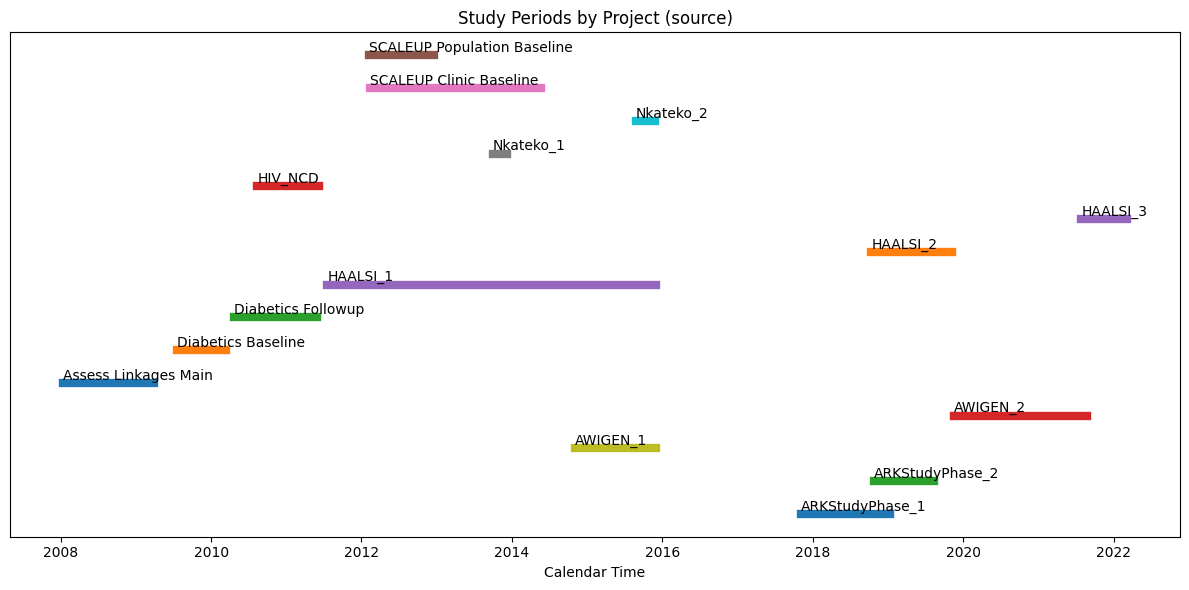

In [50]:
import matplotlib.pyplot as plt

# Ensure sorting by study start
study_periods_sorted = study_periods.sort_values("study_start")

plt.figure(figsize=(12, 6))

for i, row in study_periods_sorted.iterrows():
    plt.plot([row['study_start'], row['study_end']], 
             [i, i], linewidth=6)
    plt.text(row['study_start'], i+0.1, str(row['source']), fontsize=10)

plt.yticks([])
plt.xlabel("Calendar Time")
plt.title("Study Periods by Project (source)")
plt.tight_layout()
plt.savefig("D:/APHRC/GoogleDrive_ii/stata_do_files/madiva/stroke_work/visualization/study_periods_graph_combined.png", dpi=300, bbox_inches='tight')
plt.show()
# plt.savefig("figure_name.png", dpi=300, bbox_inches='tight')
# plt.savefig("figure_name.pdf", bbox_inches='tight')   # optional
# plt.savefig("figure_name.svg", bbox_inches='tight')   # optional

Before
(30146, 345)
Missing time_at_risk before imputation: 0 (0.00%)

Missing time_at_risk by site (%):
hdss_name
Agincourt    0.0
Nairobi      0.0
Name: time_at_risk, dtype: float64


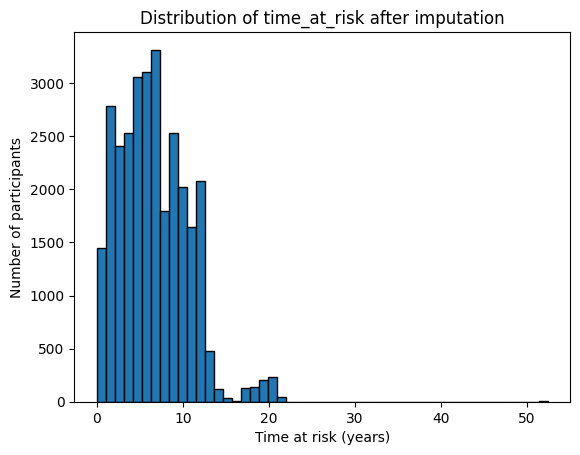

After filtering to <= first stroke, rows: 28823

Records per individual (summary):
count    9525.000000
mean        3.026037
std         1.383649
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: count, dtype: float64

Individuals with a single record: 365 (3.8%)

Top frequency counts (number of persons with X records):
count
1     365
2    4408
3    1877
4    1199
5     974
6     581
7     111
8       8
9       2
Name: count, dtype: int64


In [41]:
print("Before")
print(df.shape)

# including only periods where the person is under observation — between entry-type events and exit-type events.
# valid_events = ['enumeration', 'birth', 'inmigration', 'entry', 'exit', 'death', 'outmigration', 'OBE', 'time-varying covariate']
# valid_events = [ -2, -1, 1, 2, 4, 6] #  10   (Entry events)
# df = df[df['res_event'].isin(valid_events)].copy()

# ---------------------------------------------------------------------------
# Sorting based on an individual and observation date
df = df.sort_values(['individual_id', 'obs_date'])

# ---------------------------------------------------------------------------
# Preparing time intervals during which a person is at risk
# df['start_date'] = df.groupby('individual_id')['obs_date'].transform('min')
# df['end_date'] = df.groupby('individual_id')['obs_date'].transform('max')
df['start_date'] = df['obs_date']
df['end_date']   = df['study_end']

# ---------------------------------------------------------------------------
# Computing time at risk (person-time) in years
df['time_at_risk'] = (df['end_date'] - df['start_date']).dt.days / 30.4375 # 365.25
df['time_at_risk'] = df['time_at_risk'].fillna(df['time_at_risk'].median()) # df['time_at_risk'] = df['time_at_risk'].fillna(1.5) 

# ---------------------------------------------------------------------------
missing_time_count = df['time_at_risk'].isna().sum()
total_count = len(df)
missing_percent = (missing_time_count / total_count) * 100

print(f"Missing time_at_risk before imputation: {missing_time_count:,} ({missing_percent:.2f}%)")

# If you have a site variable, examine missingness by site
if 'site' in df.columns:
    missing_by_site = df.groupby('hdss_name')['time_at_risk'].apply(lambda x: x.isna().mean() * 100).round(2)
    print("\nMissing time_at_risk by site (%):")
    print(missing_by_site)

# Optional: visualize distribution after imputation
import matplotlib.pyplot as plt

plt.hist(df['time_at_risk'], bins=50, edgecolor='black')
plt.xlabel("Time at risk (years)")
plt.ylabel("Number of participants")
plt.title("Distribution of time_at_risk after imputation")
plt.show()
# ---------------------------------------------------------------------------

# # df = df.apply(pd.to_numeric, errors='coerce')
# df['time_at_risk'] = pd.to_numeric(df['time_at_risk'], errors='coerce')

# ---------------------------------------------------------------------------
df.loc[df['time_at_risk'] < 0.01, 'time_at_risk'] = 0.01  # avoid log(0)  [Doing some house cleaning to avoid negative offset values]

# ---------------------------------------------------------------------------
# Creating offset (Added a tiny constant (epsilon) since I was encountering some negative offset values. This is a robust and common approach in survival and Poisson models.)
df['offset'] = np.log(df['time_at_risk']) #.clip(lower=1e-6)) 

# ---------------------------------------------------------------------------
# Defining stroke event (stroke occurrence)
# df['stroke_prev'] = df.groupby('individual_id')['stroke_status_derived'].shift(1)
df['stroke_prev'] = df.groupby('individual_id')['stroke_status_derived'].shift(1).fillna(0) # A great assumption here (people didn't have stroke previously)
df['event'] = np.where((df['stroke_prev'] == 0) & (df['stroke_status_derived'] == 1), 1, 0)
df['event'] = df['event'].fillna(0)

# ---------------------------------------------------------------------------
# finding first event per person  (different from prevalence)
df['cumulative_stroke'] = df.groupby('individual_id')['stroke_status_derived'].cumsum()
# keeping only records before or up to the first stroke
df = df[df['cumulative_stroke'] <= 1]

# ---------------------------------------------------------------------------
# ---------------------------------------------------------------------------

print("After filtering to <= first stroke, rows:", df.shape[0])

# ---------------------------
# 3. How many times is each person represented?
# ---------------------------
counts = df['individual_id'].value_counts()          # number of rows per person (index = individual_id)
counts_summary = counts.describe()                   # mean, min, max, median, etc.

print("\nRecords per individual (summary):")
print(counts_summary)

# How many individuals have only one record (single-visit)?
n_single = (counts == 1).sum()
pct_single = (n_single / counts.shape[0]) * 100

print(f"\nIndividuals with a single record: {n_single} ({pct_single:.1f}%)")

# Show frequency distribution (top few)
print("\nTop frequency counts (number of persons with X records):")
freq_table = counts.value_counts().sort_index()      # index = number of records, value = # persons
print(freq_table.head(20))  # show first 20 rows; increase if needed

# # If you want the full distribution dataframe:
# freq_df = freq_table.reset_index().rename(columns={'index': 'n_records', 'individual_id': 'n_persons'})
# Create a clean dataframe version
freq_df = freq_table.reset_index(name="n_persons")
freq_df.columns = ['n_records', 'n_persons']  # rename safely

# ---------------------------
# 4. (Optional) If you intend to use months offsets in models:
#     prepare X,y,offset using offset_months
# ---------------------------
# Example:
# offset_for_model = df['offset_months']
# y_for_model = df['event']
# X_for_model = df[covariates_present]  # after your usual pre-processing


### Features & covariates

In [42]:
# df = df.fillna(0)  # or use .fillna(df.mean()) if numeric
categorical_features = [
    'sex_binary', 'alcohol_use', 'tobacco_use', 'hpt_status_derived',
    'obese_status_derived', 'diab_status_derived', 
    'bmi_category_Overweight_Obese', 'hiv_status_derived', 
    'tb_status_derived'
]

numeric_features = ['age']

target = 'event'   

#  + list(site_dummies.columns) 
# , 'res_hha_wealthtertile_2.0', 'res_hha_wealthtertile_3.0'  # (Will add these once we obtain these data points)
# ,'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'

covariates = numeric_features + categorical_features

# Convert all categorical values to strings
df[categorical_features] = df[categorical_features].astype(str)
 
# predictors to display in forest plots/compare across sites
key_predictors = ['hpt_status_derived', 'diab_status_derived', 'tb_status_derived'] # , 'site_Nairobi'
# 'sex_binary', 'alcohol_use', 'tobacco_use', 'hpt_status_derived','obese_status_derived', 'diab_status_derived','bmi_refined','hiv_status_derived', 'tb_status_derived'

print(df.offset.describe())
print(df.shape)

count    28823.000000
mean         1.613636
std          0.865332
min         -4.605170
25%          1.293855
50%          1.815433
75%          2.226232
max          3.958954
Name: offset, dtype: float64
(28823, 352)


### Covariates and dealing with infinite values

### X and y

In [43]:
df.shape
# df = df[df['stroke_status_derived']!='999']
target = 'event'

X = df[covariates].copy()
y = df[target].copy()

df.shape

(28823, 352)

### Preprocessing Pipeline

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

### Train–test split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

### Feature Importance

In [46]:
import numpy as np
import pandas as pd

def get_feature_importance(model, feature_names):
    if hasattr(model, "feature_importances_"):
        return dict(zip(feature_names, model.feature_importances_))

    if hasattr(model, "coef_"):
        return dict(zip(feature_names, model.coef_[0]))

    return "Not available"

### Full Sensitivity Analysis

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)

    # get processed feature names
    feature_names = pipe.named_steps['preprocess'].get_feature_names_out()
    model_obj = pipe.named_steps['model']

    results[name] = {
        'Train Accuracy': pipe.score(X_train, y_train),
        'Test Accuracy': pipe.score(X_test, y_test),
        'Feature Importance': get_feature_importance(model_obj, feature_names)
    }


### View Model Performance

In [48]:
performance_df = pd.DataFrame({
    model: {
        'Train Accuracy': results[model]['Train Accuracy'],
        'Test Accuracy': results[model]['Test Accuracy']
    }
    for model in results
}).T

performance_df


,Train Accuracy,Test Accuracy
Logistic Regression,0.976606,0.976639
Random Forest,0.985180,0.971435
XGBoost,0.977746,0.976061
Gradient Boosting,0.976705,0.976639


### More tests

In [49]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

# ==========================================================
# 3. PREPROCESSING PIPELINE
# ==========================================================
preprocess = ColumnTransformer(

    transformers=[

        # Numeric pipeline
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),

        # Categorical pipeline
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


# ==========================================================
# 4. DEFINE MODELS
# ==========================================================
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=300),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'Gradient Boosting': GradientBoostingClassifier()
}

pipelines = {
    name: Pipeline([
        ('preprocess', preprocess),
        ('model', model)
    ])
    for name, model in models.items()
}

# ==========================================================
# 5. FEATURE IMPORTANCE FUNCTION
# ==========================================================
def get_feature_importance(pipe, model_name):
    # Get feature names
    ohe = pipe.named_steps['preprocess'].named_transformers_['cat'].named_steps['encoder']
    cat_names = list(ohe.get_feature_names_out(categorical_features))
    feature_names = numeric_features + cat_names

    model = pipe.named_steps['model']

    # Logistic Regression
    if model_name == 'Logistic Regression':
        return pd.Series(model.coef_[0], index=feature_names).sort_values(ascending=False)

    # Random Forest or Gradient Boosting
    if hasattr(model, "feature_importances_"):
        return pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

    # XGBoost
    if model_name == 'XGBoost':
        importances = model.feature_importances_
        return pd.Series(importances, index=feature_names).sort_values(ascending=False)

    return None


# ==========================================================
# 6. TRAIN MODELS + COLLECT RESULTS
# ==========================================================
results = {}
importances = {}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)

    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    results[name] = {
        'Train Accuracy': train_score,
        'Test Accuracy': test_score
    }

    importances[name] = get_feature_importance(pipe, name)


# ==========================================================
# 7. SAVE RESULTS
# ==========================================================
results_df = pd.DataFrame(results).T
print("\n=== MODEL PERFORMANCE ===")
print(results_df)

# To view feature importance for Logistic Regression
print("\n=== Feature Importance: Logistic Regression ===")
print(importances['Logistic Regression'])


Training Logistic Regression...
Training Random Forest...
Training XGBoost...


C:\Users\dmaina\.conda\envs\data_science\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:23:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Gradient Boosting...

=== MODEL PERFORMANCE ===
                     Train Accuracy  Test Accuracy
Logistic Regression        0.976606       0.976639
Random Forest              0.985180       0.971204
XGBoost                    0.977746       0.976061
Gradient Boosting          0.976705       0.976639

=== Feature Importance: Logistic Regression ===
tb_status_derived_1.0              0.261652
age                                0.242231
alcohol_use_0.0                    0.098182
tobacco_use_1.0                    0.051552
hpt_status_derived_1.0             0.027907
diab_status_derived_1.0           -0.004836
obese_status_derived_Missing      -0.030021
hiv_status_derived_0.0            -0.084109
hiv_status_derived_1.0            -0.144820
hpt_status_derived_Missing        -0.151711
tobacco_use_0.0                   -0.207534
diab_status_derived_Missing       -0.239707
obese_status_derived_1.0          -0.279705
alcohol_use_Missing               -0.313711
bmi_category_Overweight